Assumption:
1. everyone upload {i, j, distance}

1. server will know N (GPS) in time T
    - Is it reasonable or not?
2. triangulation

TODO:
1. Find dataset
    - use real data - reasearch, location trace data, mobility
    - scale if distance is too large, MUST meet each other
    - a lot of 'people' in a shorter timespan
    - http://crawdad.org/nus/bluetooth/20070903/
1. Find software to simulate
    - https://github.com/oseiskar/corona-sniffer

In [1]:
%load_ext autoreload
%autoreload 2

from utils import * 
from draw import *
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
N, T, R = 30, 5, 50
step = 5
threshold = 15
x_coordinates, y_coordinates = get_coordinates(T, N, R, step)
print(f'Shape: {x_coordinates.shape}')

Shape: (5, 30)


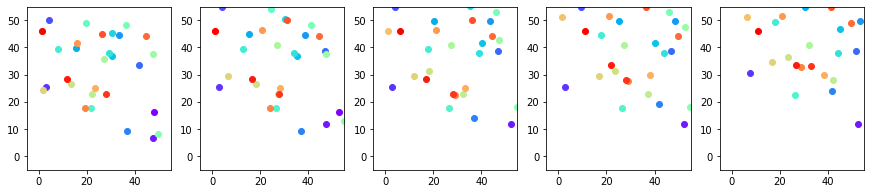

In [3]:
colors = matplotlib.cm.rainbow(np.linspace(0, 1, N))
fig, axs = plt.subplots(1, T, figsize=(3*T, 3))
for i in range(T):
    for j in range(N):
        axs[i].axis([0-step, R+step, 0-step, R+step])
        axs[i].scatter(x_coordinates[i][j], y_coordinates[i][j], color=colors[j])
plt.show()

In [4]:
distances = get_distances(x_coordinates, y_coordinates)
contacted_pairs = get_contacted_pairs(threshold, distances) # KNOWN
connected_components = get_clusters(contacted_pairs)
triangles = get_triangles(contacted_pairs)

In [6]:
contacted_pairs

[[(0, 1, 9.431207673285472),
  (0, 5, 13.13040515056166),
  (0, 15, 8.424163889301855),
  (1, 5, 10.830716752201228),
  (1, 15, 2.649472171182429),
  (2, 11, 14.874744114713454),
  (2, 19, 10.632224982680059),
  (2, 20, 1.4438799621081757),
  (2, 28, 9.427381464333385),
  (3, 11, 11.074528421980732),
  (3, 21, 4.677584756742286),
  (3, 23, 14.36209500159486),
  (3, 29, 4.9653576840084925),
  (4, 6, 13.73685024706999),
  (4, 8, 11.862336557259582),
  (4, 10, 13.461190458527712),
  (4, 16, 6.945603007138336),
  (4, 17, 14.707358330478492),
  (4, 25, 10.792033543539905),
  (5, 15, 12.983632938630517),
  (6, 8, 8.573756955235325),
  (6, 9, 3.2130953402376146),
  (6, 10, 7.892364206240986),
  (6, 13, 14.484931539345583),
  (6, 14, 4.332390935186619),
  (6, 17, 10.908433536834545),
  (6, 25, 11.115884599785307),
  (6, 26, 7.205401425595403),
  (7, 10, 13.75803125320915),
  (7, 11, 7.49588371138409),
  (7, 13, 10.152357201861278),
  (7, 17, 12.487513034745499),
  (7, 19, 13.468747969922173),


### For + 1

Known points: 19 [1, 5, 15, 11, 19, 28, 3, 29, 23, 22, 18, 24, 10, 17, 9, 26, 6, 8, 25]
Known points: 16 [1, 15, 20, 28, 19, 22, 18, 21, 29, 11, 6, 8, 10, 17, 26, 23]
Known points: 17 [1, 15, 20, 28, 11, 24, 27, 21, 29, 23, 6, 8, 10, 12, 18, 22, 17]
Known points: 18 [1, 15, 22, 18, 19, 28, 24, 27, 11, 23, 29, 3, 17, 6, 8, 4, 16, 26]
Known points: 16 [1, 15, 19, 24, 28, 11, 21, 23, 6, 8, 10, 25, 18, 22, 27, 7]


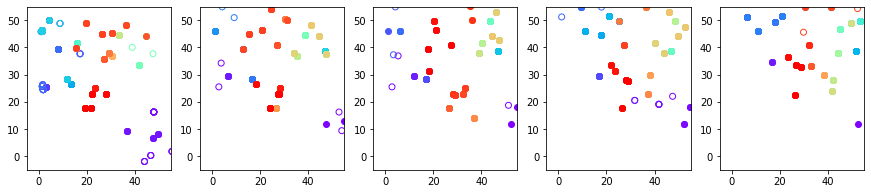

In [89]:
fixed_points_arr, random_points_arr = predicate_points(T, triangles, contacted_pairs, R, x_coordinates, y_coordinates)
draw_predicated_points(triangles, fixed_points_arr, random_points_arr, T, [0-step, R+step, 0-step, R+step])

In [90]:
for t in range(T):
    evaluate(t, x_coordinates, y_coordinates, fixed_points_arr, random_points_arr, N)

Matched: 26/30, Random: 4/30, Average error distance: 6.597699651221985e-16
Matched: 26/30, Random: 3/30, Average error distance: 5.231271313221793e-16
Matched: 26/30, Random: 4/30, Average error distance: 2.049642507000289e-16
Matched: 26/30, Random: 3/30, Average error distance: 0.0
Matched: 26/30, Random: 3/30, Average error distance: 6.832141690000964e-16


### While + 1

Known points: 11 [18, 24, 12, 22, 17, 7, 3, 29, 5, 15, 1]
Known points: 13 [24, 27, 19, 22, 11, 20, 10, 23, 17, 29, 21, 1, 15]
Known points: 13 [11, 19, 28, 27, 22, 20, 17, 23, 26, 8, 21, 1, 15]
Known points: 9 [24, 27, 19, 23, 8, 4, 15, 5, 1]
Known points: 12 [24, 28, 19, 8, 25, 6, 7, 23, 11, 29, 1, 15]


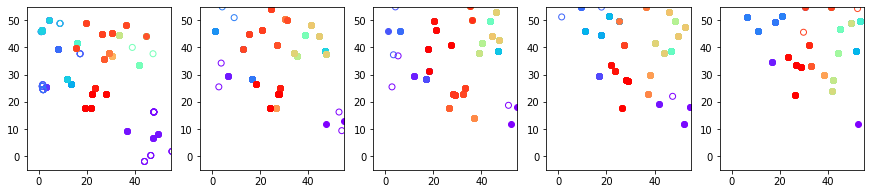

In [91]:
fixed_points_arr, random_points_arr = predicate_points(T, triangles, contacted_pairs, R, x_coordinates, y_coordinates)
draw_predicated_points(triangles, fixed_points_arr, random_points_arr, T, [0-step, R+step, 0-step, R+step])

In [93]:
for t in range(T):
    evaluate(t, x_coordinates, y_coordinates, fixed_points_arr, random_points_arr, N)

Matched: 26/30, Random: 4/30, Average error distance: 1.2063413003222757e-15
Matched: 26/30, Random: 3/30, Average error distance: 1.3664283380001927e-16
Matched: 26/30, Random: 4/30, Average error distance: 3.75767792950053e-16
Matched: 27/30, Random: 2/30, Average error distance: 4.605369583630279e-16
Matched: 26/30, Random: 3/30, Average error distance: 2.2039109278745336e-15
